In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
%matplotlib inline 

In [2]:
tran = pd.read_excel('Data/kpmg.xlsx', sheet_name='Transactions')
newCustList = pd.read_excel('Data/kpmg.xlsx', sheet_name='NewCustomerList')
custDemo = pd.read_excel('Data/kpmg.xlsx', sheet_name='CustomerDemographic')
custAdd = pd.read_excel('Data/kpmg.xlsx', sheet_name='CustomerAddress')

In [3]:
tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tran = tran.iloc[:, 0:13]

In [5]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
tran['product_first_sold_date'] = pd.to_datetime(tran['product_first_sold_date']).dt.date

In [7]:
tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01


In [8]:
tran.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [9]:
tran.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
tran.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [11]:
tran['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [12]:
tran['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [13]:
tran['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [14]:
dup = tran.duplicated()
tran[dup].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [15]:
newCustList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.93,0.9300,1.162500,0.988125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.50,0.5000,0.500000,0.500000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.90,1.1250,1.125000,1.125000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.05,1.0500,1.312500,1.312500,4,4,1.703125


In [16]:
cols = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
newCustList.drop(cols, axis = 1, inplace = True)

In [17]:
newCustList['DOB'].fillna(method='ffill', inplace = True)
newCustList['job_industry_category'].fillna(method='ffill', inplace = True)

In [18]:
newCustList['month'] = pd.DatetimeIndex(newCustList['DOB']).month
ref_date = dt.datetime.now()
newCustList['age'] = newCustList['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [19]:
newCustList.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,month,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714,6.616000,51.160000
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525,3.497825,17.096218
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000,1.000000,20.000000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531,3.000000,39.000000
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000,7.000000,50.000000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000,10.000000,65.000000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750,12.000000,84.000000


In [20]:
newCustList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              106
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
month                                    0
age                                      0
dtype: int64

In [21]:
newCustList.duplicated().sum()

0

In [22]:
newCustList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'month', 'age'],
      dtype='object')

In [23]:
newCustList['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [24]:
newCustList['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [25]:
newCustList['gender'] = newCustList['gender'].str.replace('U','Unspecified')

In [26]:
newCustList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  1000 non-null   datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [27]:
custDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [28]:
custDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [29]:
custDemo['default']

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [30]:
custDemo.drop('default', axis = 1, inplace=True)

In [31]:
custDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [32]:
custDemo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [33]:
custDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [34]:
custDemo.duplicated().sum()

0

In [35]:
custDemo['gender'].value_counts()

Female    2037
Male      1872
U           88
Femal        1
M            1
F            1
Name: gender, dtype: int64

In [36]:
custDemo['gender'] = custDemo['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unspecified')

In [37]:
custDemo['gender'].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [38]:
custDemo['DOB'].fillna(method='ffill', inplace = True)
custDemo['job_industry_category'].fillna(method='ffill', inplace = True)

In [39]:
custDemo['month'] = pd.DatetimeIndex(custDemo['DOB']).month
ref_date = dt.datetime.now()
custDemo['age'] = custDemo['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [40]:
custDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [41]:
custDemo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'month', 'age'],
      dtype='object')

In [42]:
custDemo['DOB'].sort_values(ascending=True)

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2413   1943-08-11
          ...    
421    2002-01-06
2857   2002-01-09
3434   2002-01-15
1887   2002-01-26
65     2002-03-11
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [43]:
custAdd.head()

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,9 Oakridge Court,3216,VIC,Australia,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
custAdd = custAdd.iloc[:, 0:6]

In [45]:
custAdd

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [46]:
custAdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [47]:
custAdd.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [48]:
custAdd.duplicated().sum()

0

In [49]:
custAdd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [50]:
tran.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date        1
dtype: int64

In [51]:
newCustList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Rank                                    324
Value                                   324
month                                    12
age                                      65
dtype: int64

In [52]:
custDemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
month                                    12
age                                      56
dtype: int64

In [53]:
custAdd['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [54]:
custAdd['state'] = custAdd['state'].str.replace('New South Wales','NSW').replace('Victoria','VIC')

In [55]:
custDemoState = pd.merge(custDemo, custAdd[['state', 'customer_id']], on = 'customer_id', how = 'left')

In [56]:
custDemoState['state'].fillna(method='ffill', inplace = True)

In [57]:
df = custDemoState
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [58]:
df['age'].unique()

array([ 69,  42,  68,  61,  45,  56,  46,  60,  49,  34,  28,  67,  39,
        22,  55,  21,  27,  44,  54,  65, 179,  59,  37,  43,  41,  47,
        50,  30,  63,  66,  26,  52,  57,  20,  62,  48,  53,  29,  33,
        36,  64,  38,  24,  25,  32,  23,  40,  58,  35,  51,  31,  78,
        91,  87,  79,  82], dtype=int64)

In [59]:
df = df[df['age'] < 100].reset_index(drop=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3999 non-null   int64         
 1   first_name                           3999 non-null   object        
 2   last_name                            3874 non-null   object        
 3   gender                               3999 non-null   object        
 4   past_3_years_bike_related_purchases  3999 non-null   int64         
 5   DOB                                  3999 non-null   datetime64[ns]
 6   job_title                            3493 non-null   object        
 7   job_industry_category                3999 non-null   object        
 8   wealth_segment                       3999 non-null   object        
 9   deceased_indicator                   3999 non-null   object        
 10  owns_car    

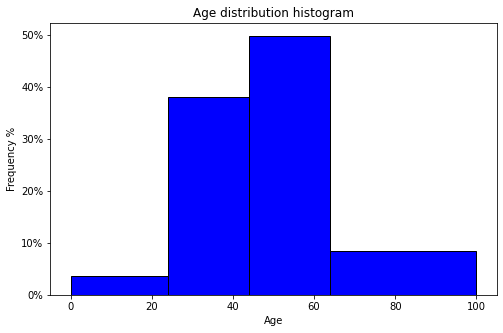

In [61]:
#Data visualisation of old Customers

plt.figure(figsize = (8,5))
plt.hist(df['age'], color = 'blue', edgecolor = 'black', bins=[0,24,44,64,100], weights=np.ones(len(df['age'])) / len(df['age']))
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency %')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('Old_Output/age_dist_histogram.png')
plt.show()

In [62]:
df['past_3_years_bike_related_purchases'].groupby(df['gender']).agg('sum')

gender
Female         98359
Male           93483
Unspecified     3659
Name: past_3_years_bike_related_purchases, dtype: int64

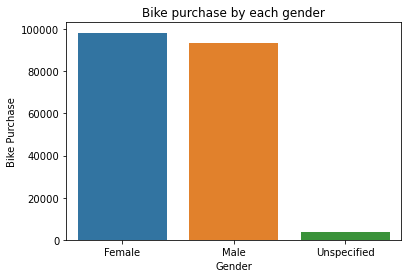

In [63]:
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', data=df, ci=None, estimator=sum)
plt.title('Bike purchase by each gender')
plt.xlabel('Gender')
plt.ylabel('Bike Purchase')
plt.savefig('Old_Output/Bike_purchase-gender_graph.png')
plt.show()

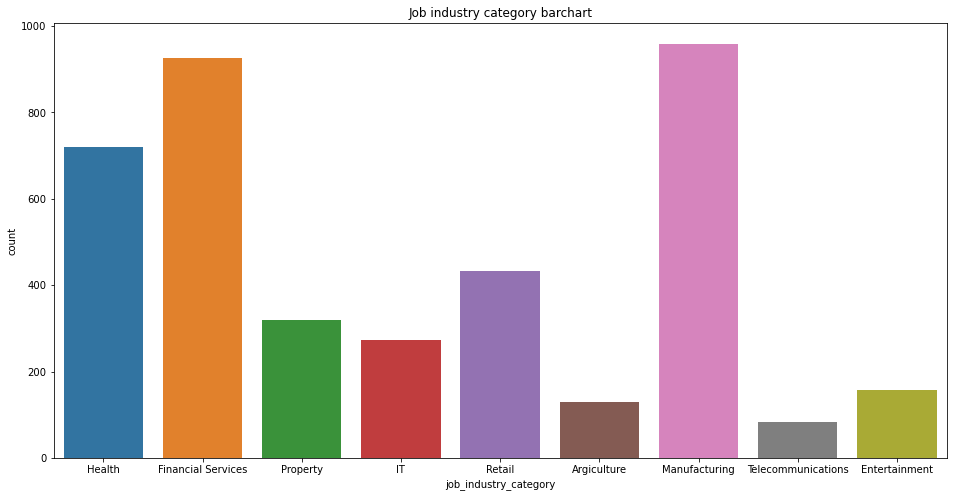

In [64]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = df)
plt.title('Job industry category barchart')
plt.savefig('Old_Output/job_industry_original.png')
plt.show()

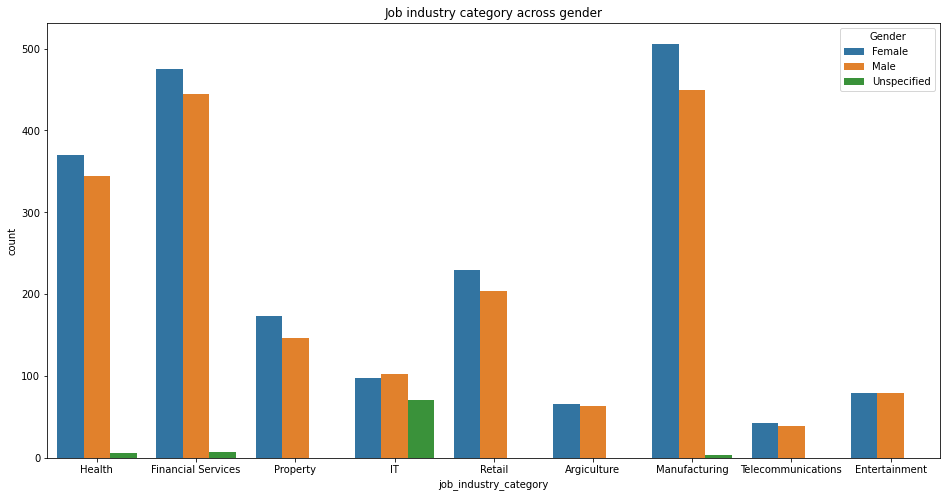

In [65]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right')
plt.title('Job industry category across gender')
plt.savefig('Old_Output/job_industry-gender.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

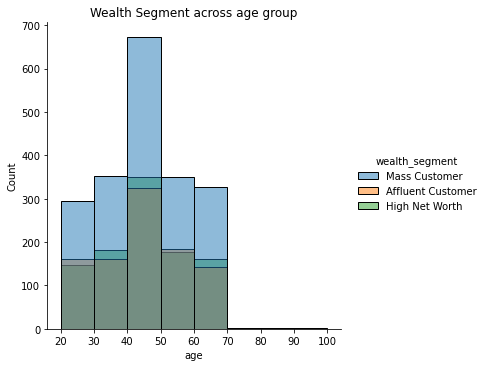

In [66]:
plt.figure(figsize = (16,8))
sns.displot(x='age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('Old_Output/wealth_segment_age_original.png')
plt.show()

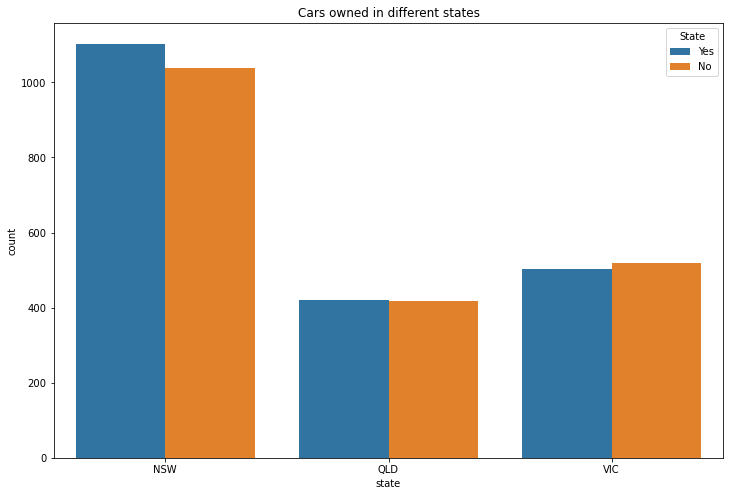

In [67]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right')
plt.title('Cars owned in different states')
plt.savefig('Old_Output/owns_car-state_original.png')
plt.show()

In [68]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('Old_Output/current_customers.xlsx', sheet_name='1', index=False)

In [69]:
df = newCustList

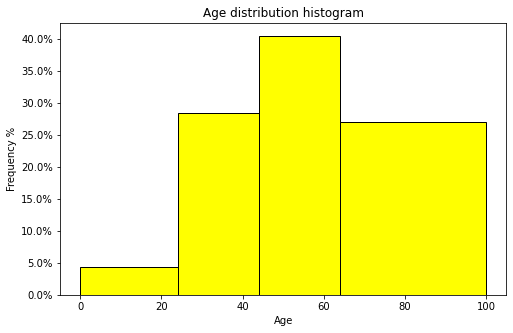

In [70]:
#Data visualisation of New Customers

plt.figure(figsize = (8,5))
plt.hist(df['age'], color = 'yellow', edgecolor = 'black', bins=[0,24,44,64,100], weights=np.ones(len(df['age'])) / len(df['age']))
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency %')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('New_Output/new_age_dist_histogram.png')
plt.show()

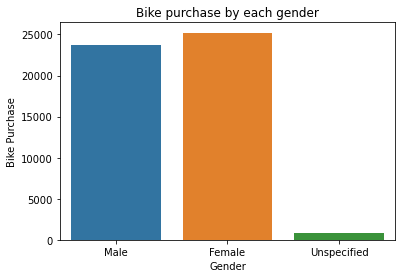

In [71]:
sns.barplot(x='gender', y='past_3_years_bike_related_purchases', data=df, ci=None, estimator=sum)
plt.title('Bike purchase by each gender')
plt.xlabel('Gender')
plt.ylabel('Bike Purchase')
plt.savefig('New_Output/new_Bike_purchase-gender_graph.png')
plt.show()

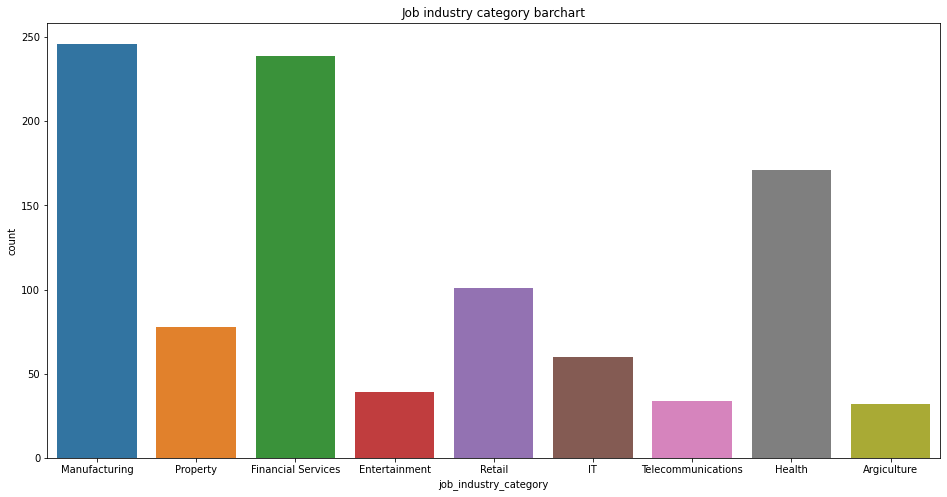

In [72]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data = df)
plt.title('Job industry category barchart')
plt.savefig('New_Output/new_job_industry_original.png')
plt.show()

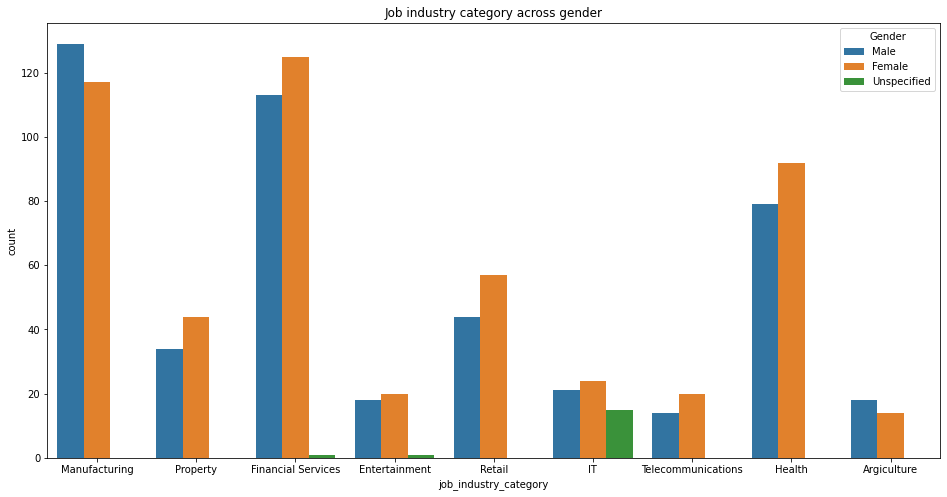

In [73]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right')
plt.title('Job industry category across gender')
plt.savefig('New_Output/new_job_industry-gender.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

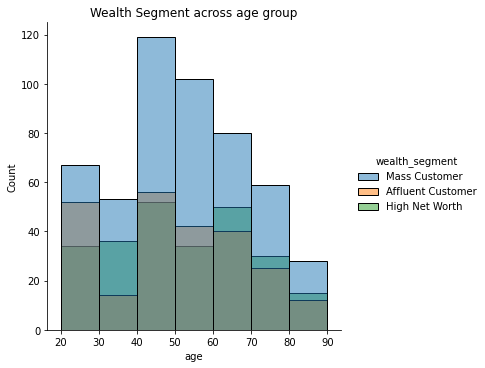

In [74]:
plt.figure(figsize = (16,8))
sns.displot(x='age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('New_Output/new_wealth_segment_age_original.png')
plt.show()

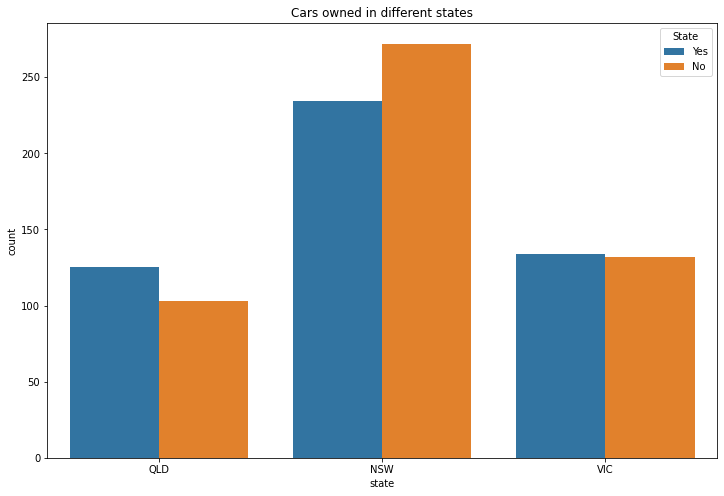

In [75]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right')
plt.title('Cars owned in different states')
plt.savefig('New_Output/new_owns_car-state_original.png')
plt.show()

In [76]:
#print the final file to excel ready to be used as a data source for dashboard
df.to_excel('New_Output/target_new_customers.xlsx', sheet_name='1', index=False)